In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases'
#                  '/breast-cancer-wisconsin/wdbc.data',header=None)
df = pd.read_csv('wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X = df.loc[:,2:].values
y = df.loc[:,1].values

le = LabelEncoder()
y = le.fit_transform(y)
print(f"New classes {le.transform(le.classes_)} are equivalente to old clases {le.classes_}, respectively")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

New classes [0 1] are equivalente to old clases ['B' 'M'], respectively


In [8]:
# Feature extraction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # equivalente to: stdsc.fit(X_train) and then X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

pca = PCA(n_components=2) # PCA is an unsupervised feature extraction strategy since class labels are not taken into account
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Decision tree train/test accuracies 1.000/0.939
Bagging train/test accuracies 1.000/0.939


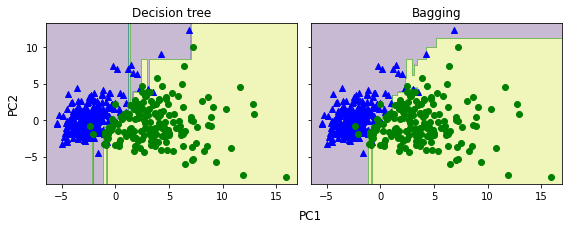

In [13]:
######################## Bagging #######################

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)


tree = tree.fit(X_train_pca, y_train)
y_train_pred = tree.predict(X_train_pca)
y_test_pred = tree.predict(X_test_pca)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))


bag = bag.fit(X_train_pca, y_train)
y_train_pred = bag.predict(X_train_pca)
y_test_pred = bag.predict(X_test_pca)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

# Plots
x_min = X_train_pca[:, 0].min() - 1
x_max = X_train_pca[:, 0].max() + 1
y_min = X_train_pca[:, 1].min() - 1
y_max = X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

for idx, clf, tt in zip([0, 1], 
                        [tree, bag], 
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train_pca, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train_pca[y_train==0, 0],
                       X_train_pca[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train_pca[y_train==1, 0],
                       X_train_pca[y_train==1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('PC2', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2,
         s='PC1',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)
plt.show()

Decision tree train/test accuracies 0.923/0.877
AdaBoost train/test accuracies 1.000/0.974


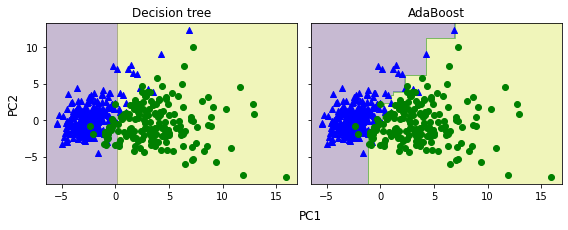

In [17]:
################ Adaptive Boosting ##################

from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

# Plots
x_min = X_train_pca[:, 0].min() - 1
x_max = X_train_pca[:, 0].max() + 1
y_min = X_train_pca[:, 1].min() - 1
y_max = X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

for idx, clf, tt in zip([0, 1], 
                        [tree, ada], 
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train_pca, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train_pca[y_train==0, 0],
                       X_train_pca[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train_pca[y_train==1, 0],
                       X_train_pca[y_train==1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('PC2', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2,
         s='PC1',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)
plt.show()